In [2]:
import pandas as pd
df = pd.read_csv('earthquake_1995-2023.csv')

# INFO

In [3]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [5]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [6]:
nill=round(df.isnull().sum()/df.shape[0]*100,2)
nill[nill>0.1]
#continent,country,alert have 73%,38%,46% null values
#we can drop continenet(too much null values)
#we have latitude and longitude so we can drop location
#alert is a unnecessary data

,0
alert,55.1
location,0.6
continent,71.6
country,34.9


In [7]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

# DROPING UNNECESSARY COLUMNS

In [8]:
df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)

In [9]:
#Converting date_time to year and month
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

/tmp/ipython-input-2785639632.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time']=pd.to_datetime(df['date_time'])


In [10]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,2023,7


In [11]:
df.isnull().sum()

,0
magnitude,0
cdi,0
mmi,0
tsunami,0
sig,0
net,0
nst,0
dmin,0
gap,0
magType,0


# EDA

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/tmp/ipython-input-4072910285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='magnitude', data=df, palette='viridis',order=M_order)


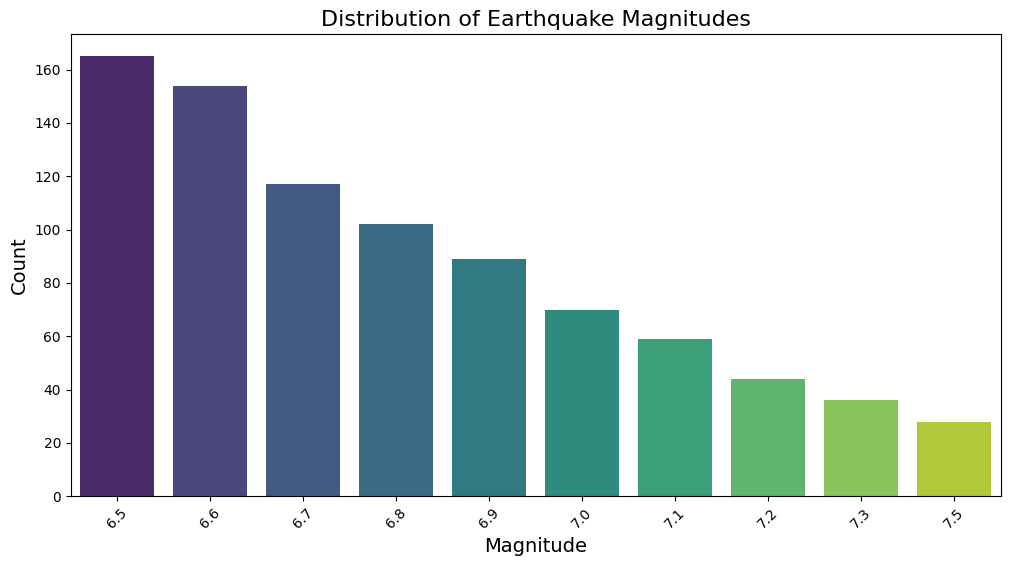

In [13]:
M_order=df['magnitude'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(x='magnitude', data=df, palette='viridis',order=M_order)
plt.title('Distribution of Earthquake Magnitudes', fontsize=16)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()
#Most earthquakes tend to be around 6.5 to 6.7 on the scale

/tmp/ipython-input-3042972420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=df, order=c_order, palette='Set2')


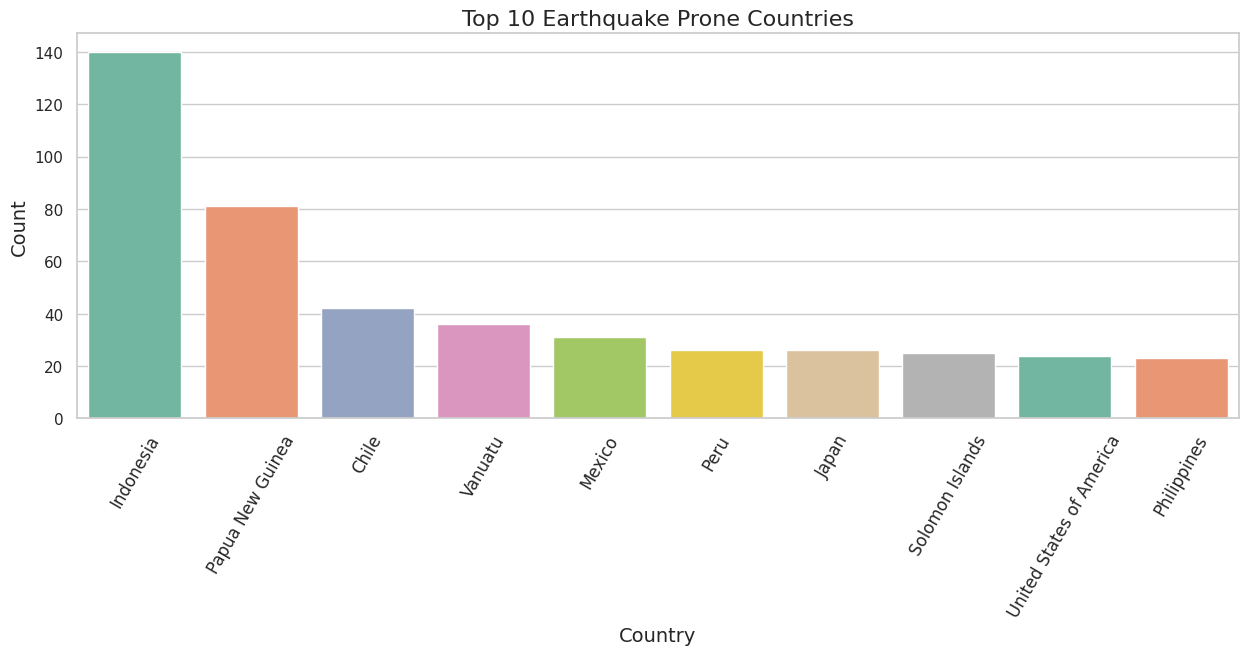

In [14]:
c_order = df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 5))

sns.set(style="whitegrid")
sns.countplot(x='country', data=df, order=c_order, palette='Set2')
plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Earthquake Prone Countries', fontsize=16)
plt.show()


#Indonesia faced the highest number of earthquakes.

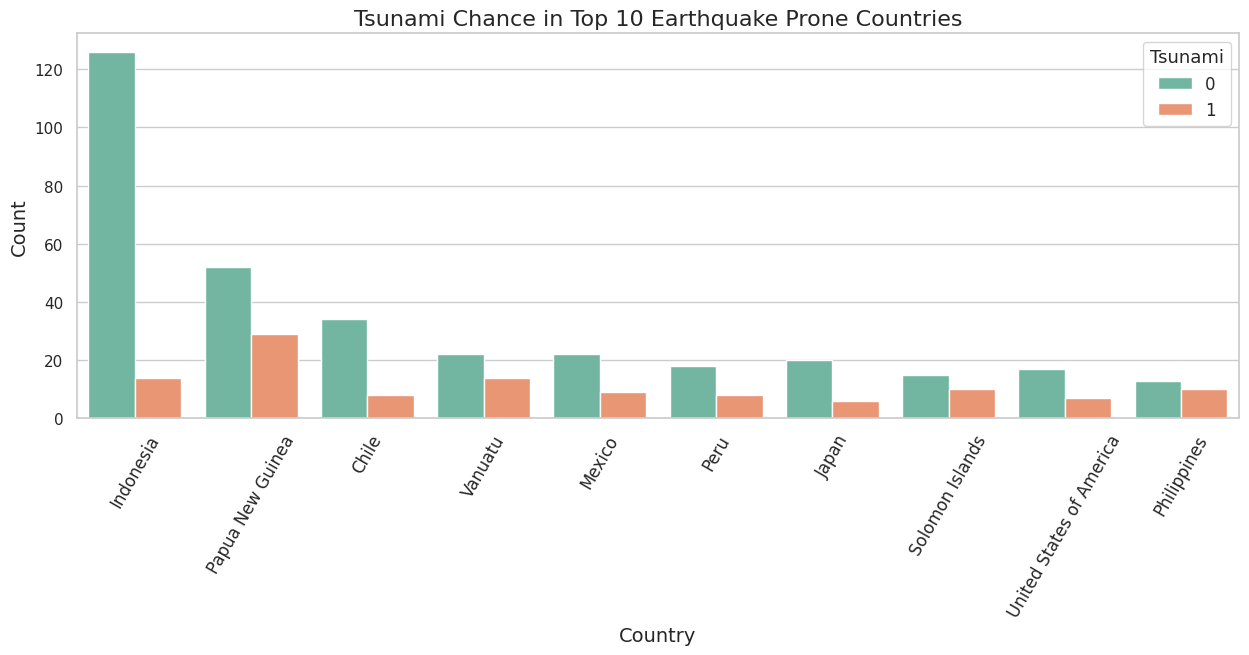

In [15]:
c_order = df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 5))

sns.set(style="whitegrid")

sns.countplot(x='country', data=df, order=c_order, hue='tsunami', palette='Set2')

plt.xticks(rotation=60, fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Tsunami Chance in Top 10 Earthquake Prone Countries', fontsize=16)
plt.legend(title='Tsunami', title_fontsize='13', fontsize='12')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.

In [19]:
country_count = df.groupby('country')['tsunami'].value_counts().unstack(fill_value=0)
country_count.columns = ['No Tsunami', 'Tsunami']
country_count['Earthquick']=country_count['No Tsunami']+country_count['Tsunami']
country_count['Tsunami Probability']=round((country_count['Tsunami']/country_count['Earthquick'])*100,2)

# Filter out countries with a minimum number of earthquakes
threshold = 5
filtered_country=country_count[country_count['Earthquick']>threshold]
top_15_tsunami_countries=filtered_country.sort_values(by='Tsunami Probability',ascending=False).head(15)
print(top_15_tsunami_countries[['Tsunami Probability', 'Earthquick']])




                          Tsunami Probability  Earthquick
country                                                  
Fiji                                    80.00          10
New Zealand                             55.56           9
Ecuador                                 50.00          10
Philippines                             43.48          23
Solomon Islands                         40.00          25
Vanuatu                                 38.89          36
Papua New Guinea                        35.80          81
Argentina                               33.33           6
Taiwan                                  33.33           9
Peru                                    30.77          26
United States of America                29.17          24
Mexico                                  29.03          31
Russia                                  26.32          19
Colombia                                25.00           8
Japan                                   23.08          26


In [21]:
# plt.figure(figsize=(15, 5))
# ax=sns.barplot(x=top_10_tsunami_countries.index, y=top_10_tsunami_countries['Tsunami Probability'], palette='Set2')
# plt.xticks(rotation=60, fontsize=12)
# plt.xlabel('Country', fontsize=14)
# plt.ylabel('Tsunami Probability (%)', fontsize=14)
# plt.title('Top 15 Countries with Highest Tsunami Probability After Earthquakes(atleast 5)', fontsize=16)

# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()+3),
#                 ha='center', va='center',fontsize=12, color='black')


/tmp/ipython-input-2742635334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='net',data=df,palette='Set2')


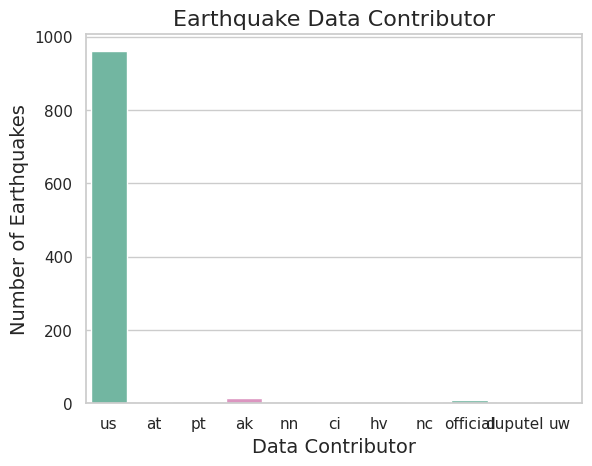

In [22]:
sns.countplot(x='net',data=df,palette='Set2')
plt.title('Earthquake Data Contributor', fontsize=16)
plt.xlabel('Data Contributor', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
#The US is a major contributor of earthquake data
plt.show()

/tmp/ipython-input-660296203.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tsunami', data=df, palette='Set2')


Text(0, 0.5, 'Count')

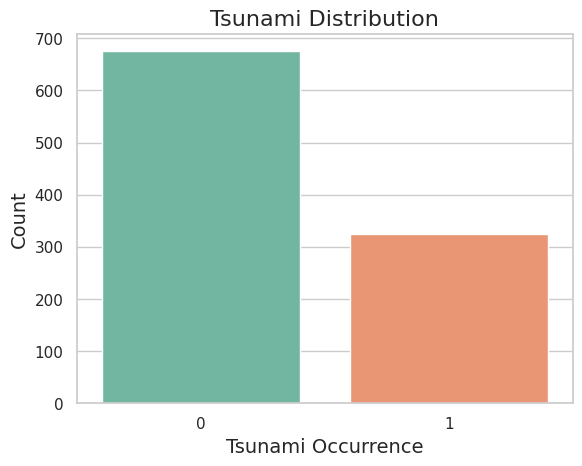

In [23]:
sns.countplot(x='tsunami', data=df, palette='Set2')

plt.title('Tsunami Distribution', fontsize=16)
plt.xlabel('Tsunami Occurrence', fontsize=14)
plt.ylabel('Count', fontsize=14)

/tmp/ipython-input-3147327467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, order=top_years, palette='Set2')


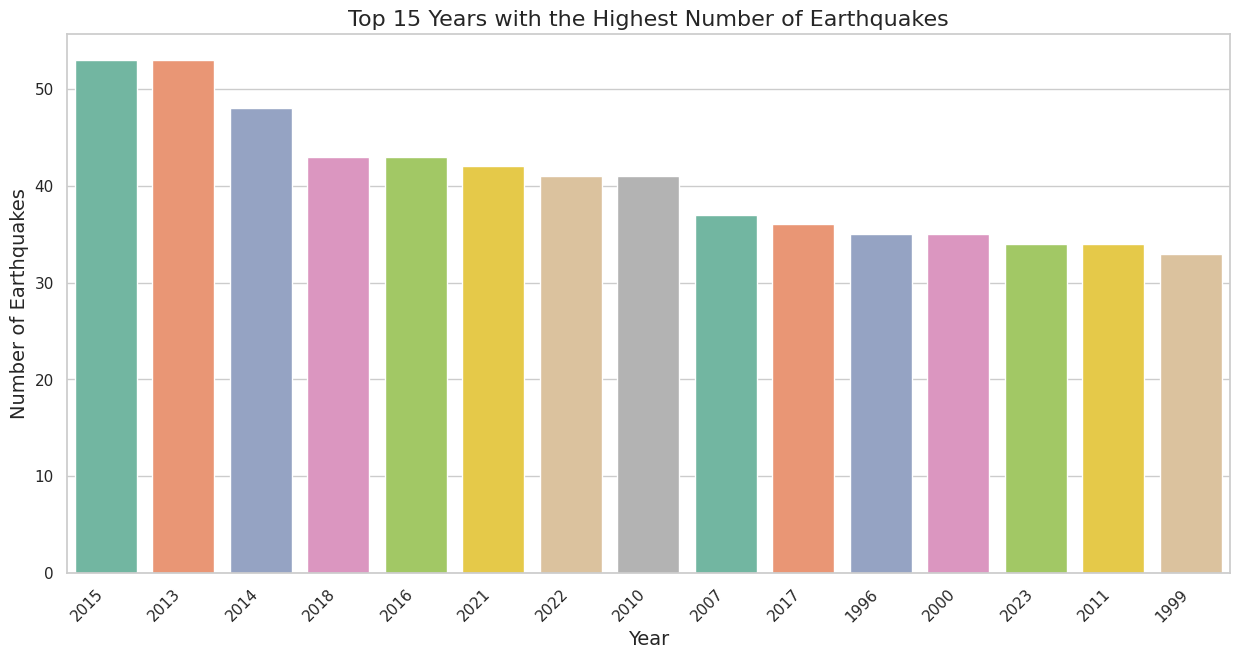

In [24]:
plt.figure(figsize=(15, 7))

top_years = df['Year'].value_counts().head(15).index
sns.countplot(x='Year', data=df, order=top_years, palette='Set2')
plt.title('Top 15 Years with the Highest Number of Earthquakes', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()
#In 2015 and 2013, the world experienced the highest number of earthquakes.

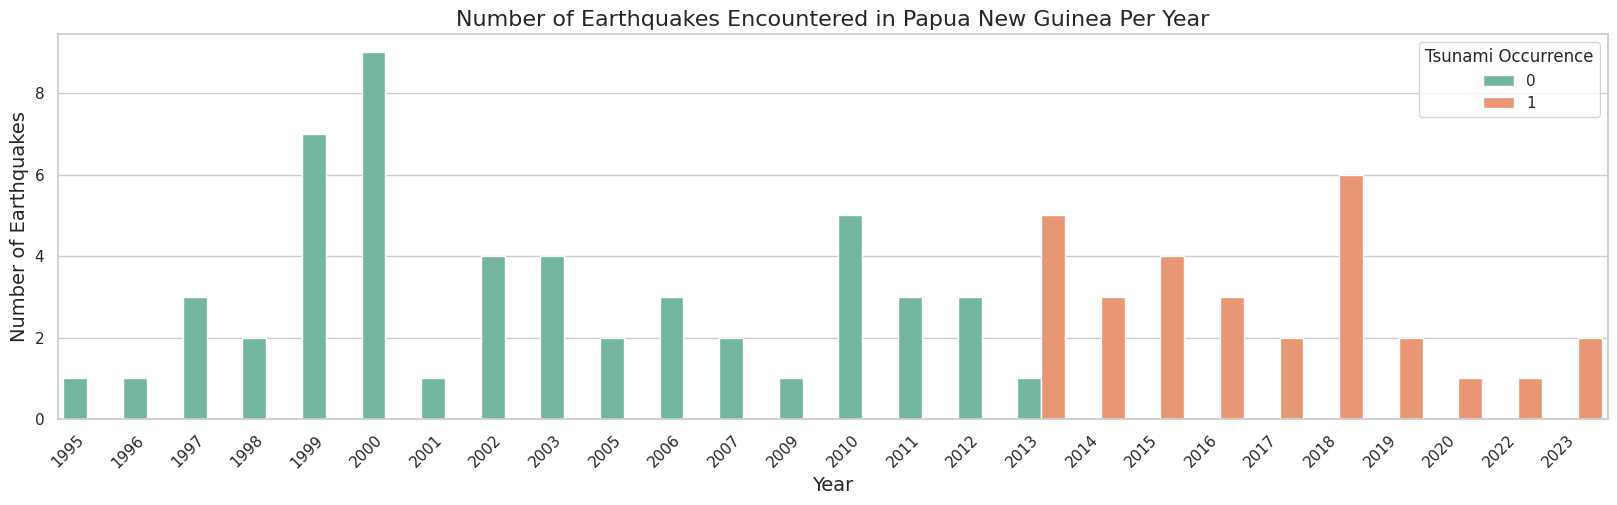

In [25]:
Papua=df[df['country']=='Papua New Guinea']

plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Papua, hue='tsunami', palette='Set2')

plt.title('Number of Earthquakes Encountered in Papua New Guinea Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.legend(title='Tsunami Occurrence')
#Papua New Guinea experiences at least one earthquake per year but before 2013 Papua New Guinea never experienced tsunami after earthquick

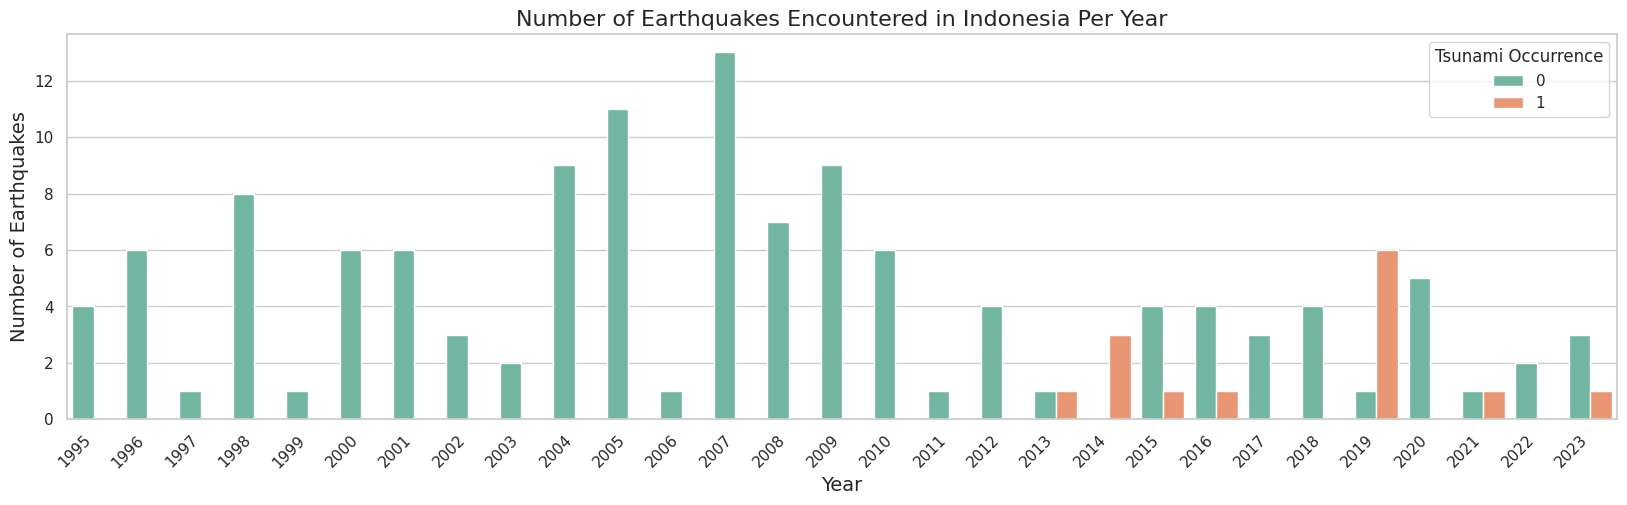

In [26]:
Indo = df[df['country'] == 'Indonesia']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Indo, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in Indonesia Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()
#Indonesia encountered 13 earthquic in the year 2007

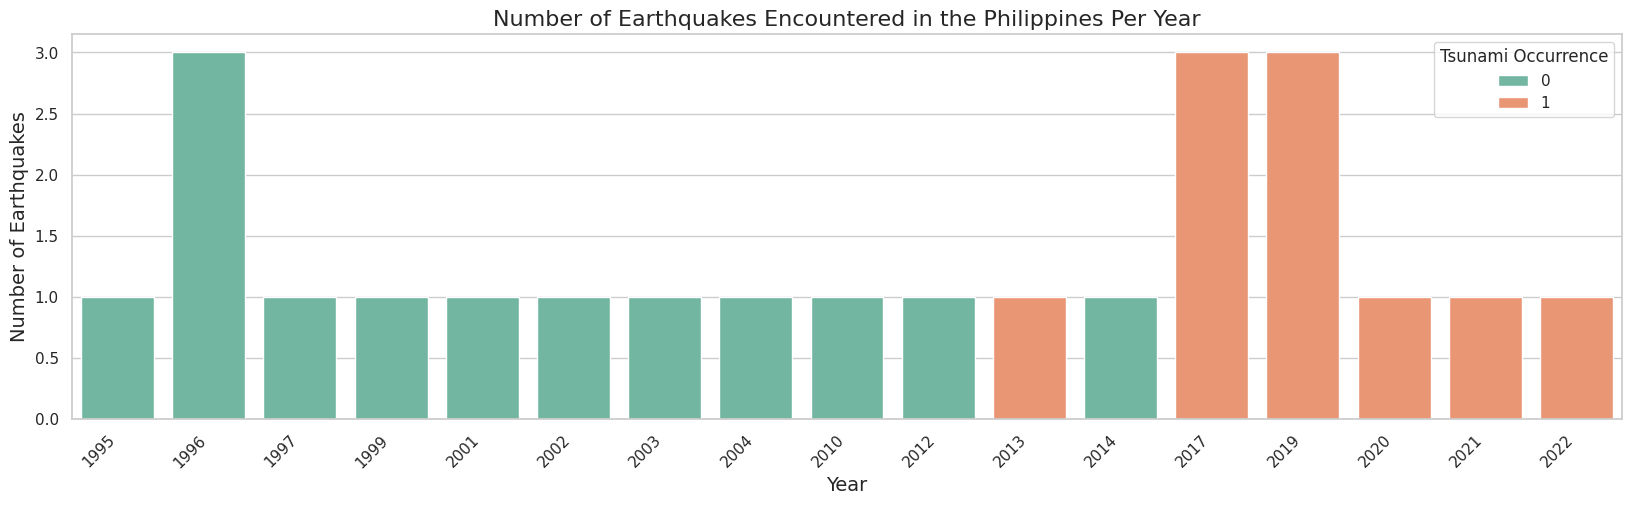

In [27]:

Phi = df[df['country'] == 'Philippines']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Phi, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in the Philippines Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()
# The Philippines has experienced all of tsunamis in recent years(After 2013) following earthquakes.

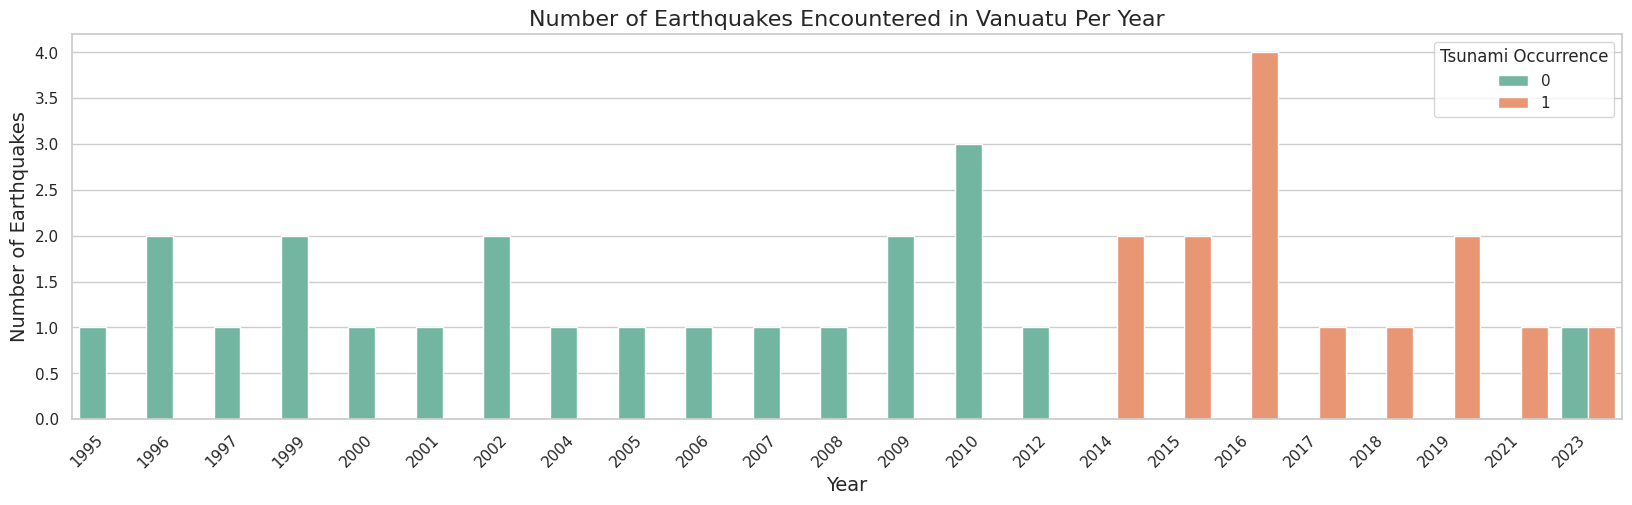

In [28]:
Van = df[df['country'] == 'Vanuatu']
plt.figure(figsize=(20, 5))
sns.countplot(x='Year', data=Van, hue='tsunami', palette='Set2')
plt.title('Number of Earthquakes Encountered in Vanuatu Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tsunami Occurrence')
plt.show()

### Note:
## After examining the countries most affected by tsunamis, we can conclude that there has been a significant change in climate. Most earthquake-prone countries are facing a greater chance of tsunamis following earthquakes, especially after 2013.

# FEATURE ENGINEERING

In [29]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,2023,7


In [30]:
df.drop('country',axis=1,inplace=True)#we have latitude and longitude

In [31]:
obj=df.select_dtypes(include=['object'])
obj
#we can drop net because 95% of data contributed by US

,net,magType
0,us,mww
1,us,mww
2,us,mww
3,us,mww
4,at,Mi
...,...,...
995,us,mwb
996,us,mw
997,us,mw
998,us,mw


In [32]:
obj.nunique()

,0
net,11
magType,9


In [33]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType'],axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580,2023,8,8
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265,2023,7,8
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731,2023,7,8
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990,2023,7,8
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960,2023,7,0


<Axes: >

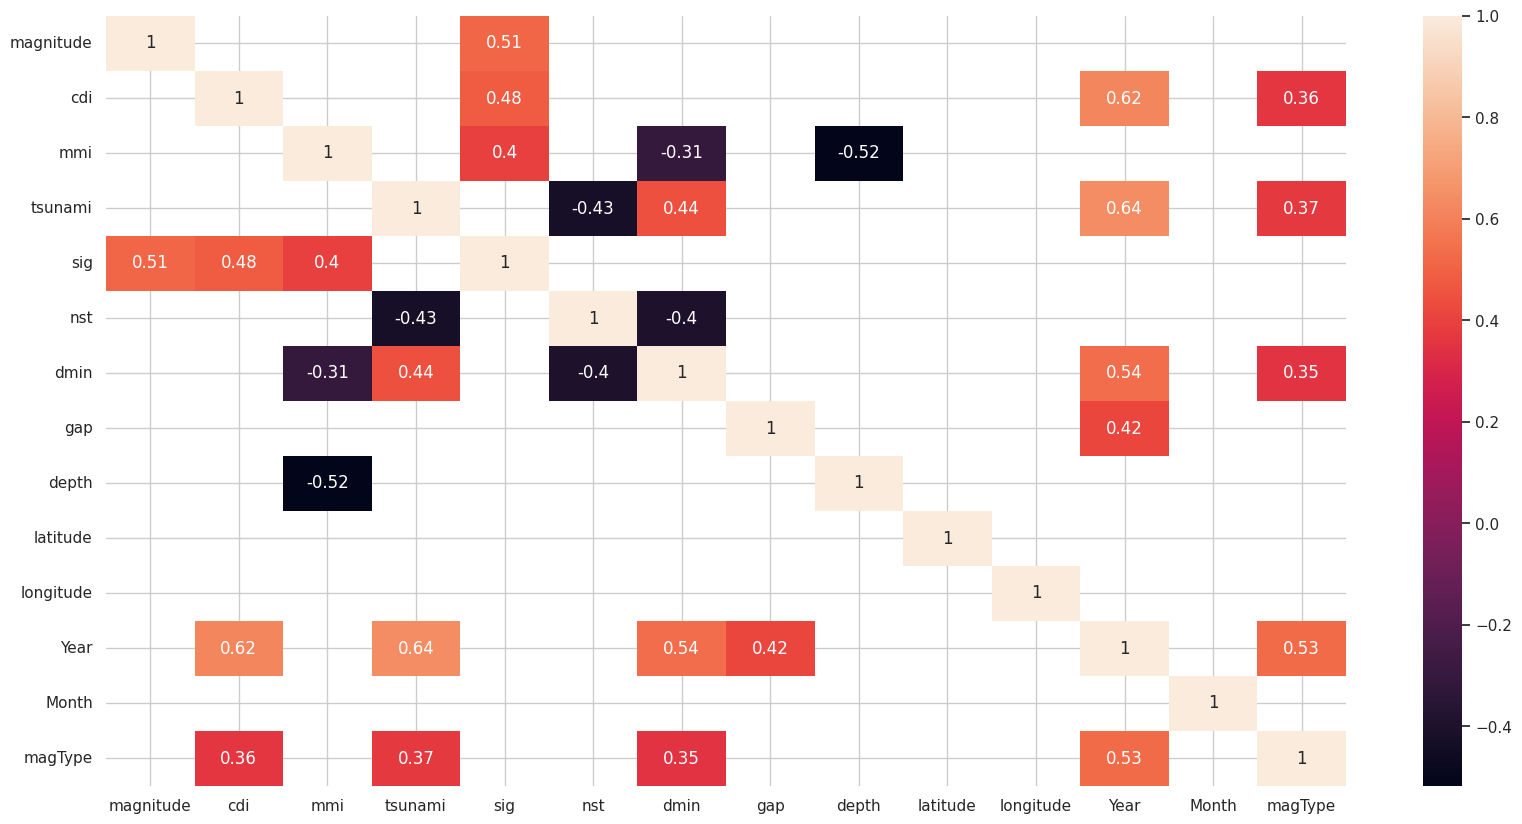

In [34]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

# SCALING AND MODEL BUILDING

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [36]:
sc=StandardScaler()
x=df.drop('tsunami',axis=1)
y=df['tsunami']
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:

sc = StandardScaler()

x=df.drop('tsunami',axis=1)
y=df['tsunami']
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

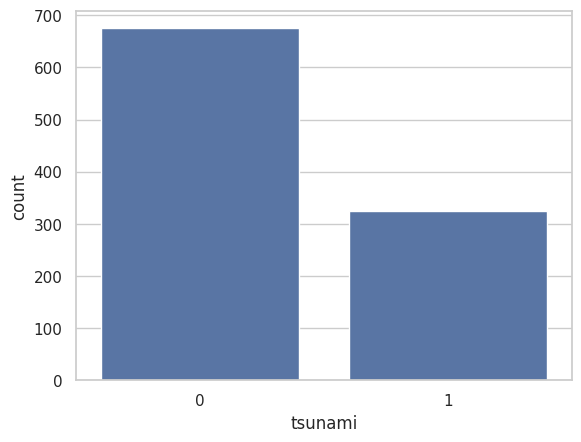

In [38]:
sns.countplot(x=y,data=df)

# DEALING WITH IMBALANCE DATA

In [39]:
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)

In [40]:
x_train.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,-1.005072,1.621431,0.678866,-0.523501,-0.811623,-0.543004,-0.857505,-0.507946,-1.729886,1.044676,0.368962,0.404830,0.702122
1,-0.776724,-0.782915,-0.716542,-0.589803,-0.811623,1.023502,-0.365776,-0.394751,-0.406700,0.876970,0.490291,1.552472,0.702122
2,0.365014,0.419258,-1.414246,0.520750,1.059247,-0.543004,-0.275626,1.662655,1.083826,0.736312,-0.116355,0.404830,-0.195732
3,-0.091682,0.118715,0.678866,-0.367692,1.096916,-0.543004,-0.214160,-0.356509,-0.386234,0.842632,0.004974,0.117920,-0.195732
4,-1.005072,1.320888,0.678866,0.497544,-0.811623,0.598335,0.289862,0.117689,-0.443563,0.482777,0.854278,1.552472,0.702122


In [41]:
models = {
    "Logistic regression":LogisticRegression(),
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}

# RESULT

In [42]:
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Logistic regression
------------------------------
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       135
           1       0.74      0.92      0.82        65

    accuracy                           0.87       200
   macro avg       0.85      0.88      0.86       200
weighted avg       0.89      0.87      0.87       200

.........................................................|
Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       135
           1       0.86      0.86      0.86        65

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       0

# GRID SEARCH :HYPERPARAMETER

In [43]:
# Model:  xg
model=xgb.XGBClassifier()
params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
        }
grid= GridSearchCV(model, params, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.9537037037037036


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       135
           1       0.88      0.94      0.91        65

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

Axes(0.125,0.11;0.62x0.77)


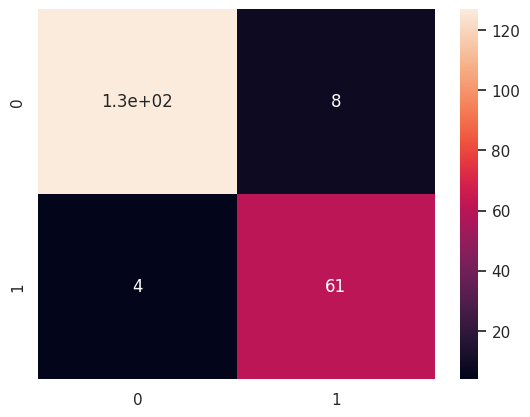

In [44]:
p = grid.predict(x_test)
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True))

In [45]:
# Model: RandomForest
model=RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid= GridSearchCV(model, params, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

{'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.9296296296296298


              precision    recall  f1-score   support

           0       0.99      0.84      0.91       135
           1       0.74      0.98      0.85        65

    accuracy                           0.89       200
   macro avg       0.87      0.91      0.88       200
weighted avg       0.91      0.89      0.89       200

Axes(0.125,0.11;0.62x0.77)


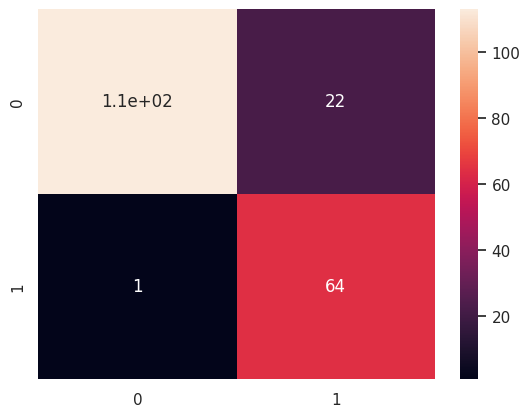

In [46]:
p = grid.predict(x_test)
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True))